# Ковариация и корреляция

In [1]:
import pandas as pd 
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Задаем даты анализируемого периода
start = dt.datetime(2018, 1, 1) # (2022, 2, 24)
end = dt.datetime(2023, 1, 9) # (2022, 2, 24)

In [3]:
# Составляем пакет акций
stocks = {"Google":"GOOG",
          "Pfizer":"PFE",
          "Boeing":"BA",
          "Ford":"F",
          "Volkswagen":"VWAGY",
          "Micron":"MU",
          "TSMC":"TSM",
          "Texas Instruments":"TXN",
          "Qualcomm":"QCOM",
          "NVidia":"NVDA"
         }

In [4]:
# Делаем упорядоченный по отраслям список тикеров акций 
tickers = list(stocks.values())

In [5]:
# формируем исторические данные по нашему портфелю
portfolio =  pdr.get_data_yahoo(tickers,
                                    start, 
                                    end)['Adj Close'] # Выбираем только значения по закрытию торгов
portfolio = portfolio.astype('float')
portfolio.head() 

[*********************100%***********************]  10 of 10 completed


,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
Date,,,,,,,,,,
2018-01-02,282.886444,10.493732,53.250000,43.228352,49.334671,28.821972,56.681896,35.466259,92.385040,16.637171
2018-01-03,283.801300,10.576621,54.124001,44.525105,52.581577,29.035524,57.325222,36.062828,94.887848,16.826420
2018-01-04,282.724365,10.758977,54.320000,46.405884,52.858742,29.098804,57.403450,35.872623,94.765320,17.321974
2018-01-05,294.322296,10.941333,55.111500,45.336807,53.306690,29.154175,57.785965,36.711285,95.491661,17.619717
2018-01-08,295.570679,10.899888,55.347000,45.089336,54.940041,28.829880,57.612087,36.693993,95.946716,17.627874


In [6]:
portfolio.shape

(1259, 10)

In [7]:
portfolio.dtypes

BA       float64
F        float64
GOOG     float64
MU       float64
NVDA     float64
PFE      float64
QCOM     float64
TSM      float64
TXN      float64
VWAGY    float64
dtype: object

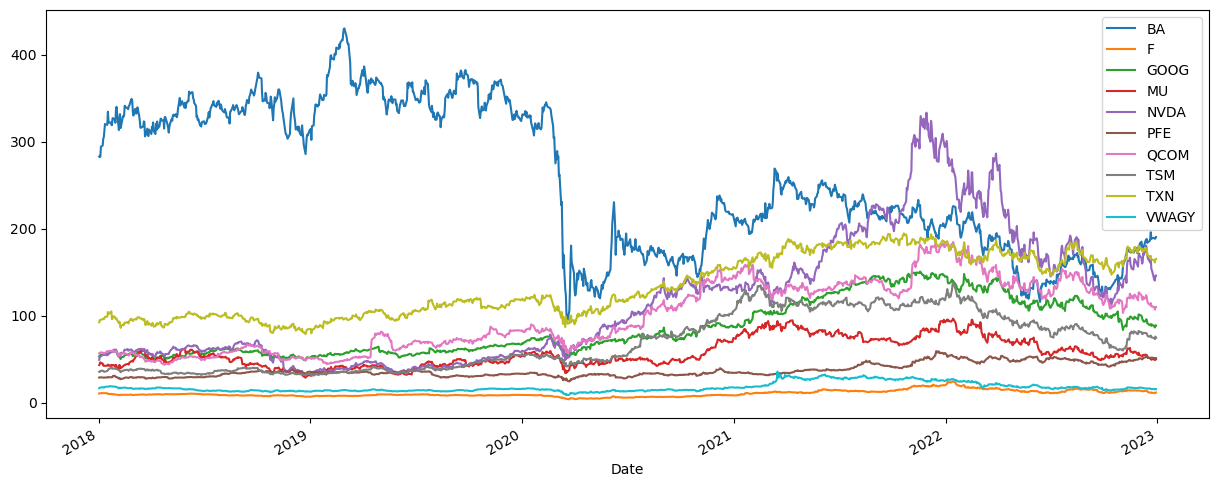

In [8]:
portfolio.plot(figsize=(15,6))
plt.show()

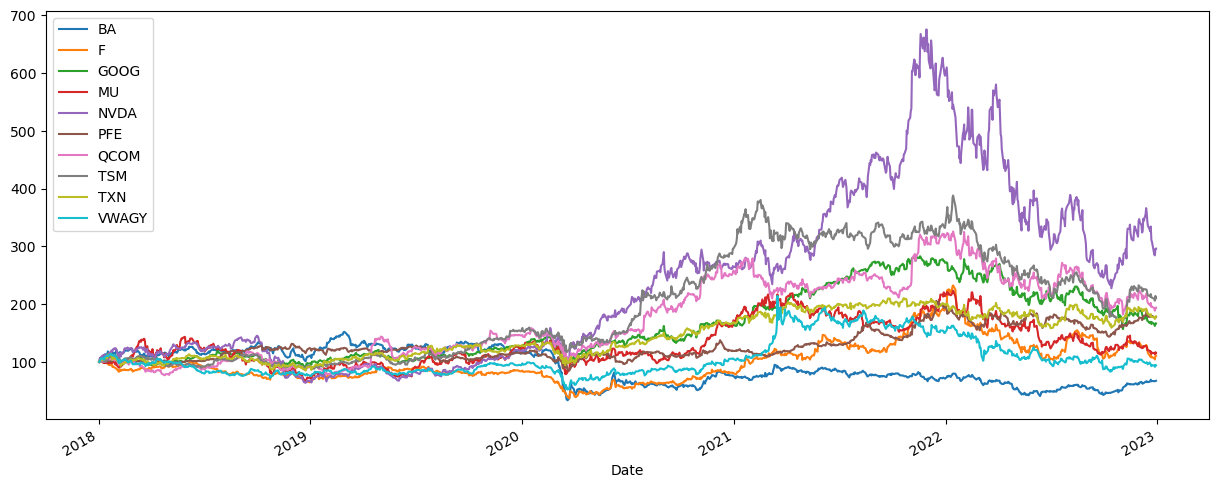

In [9]:
(portfolio / portfolio.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

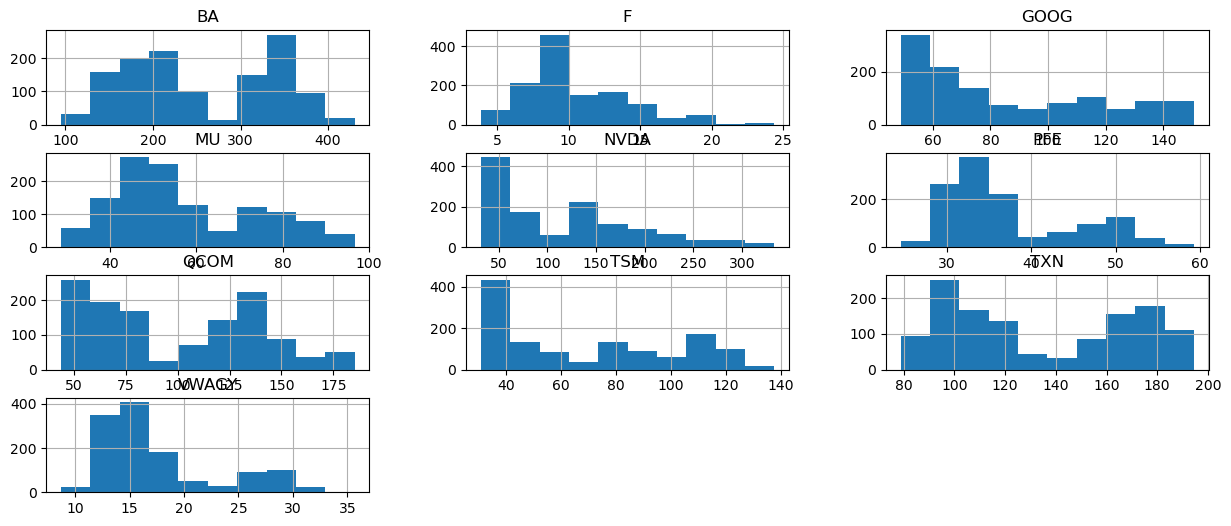

In [10]:
portfolio.hist(figsize=(15,6))
plt.show()

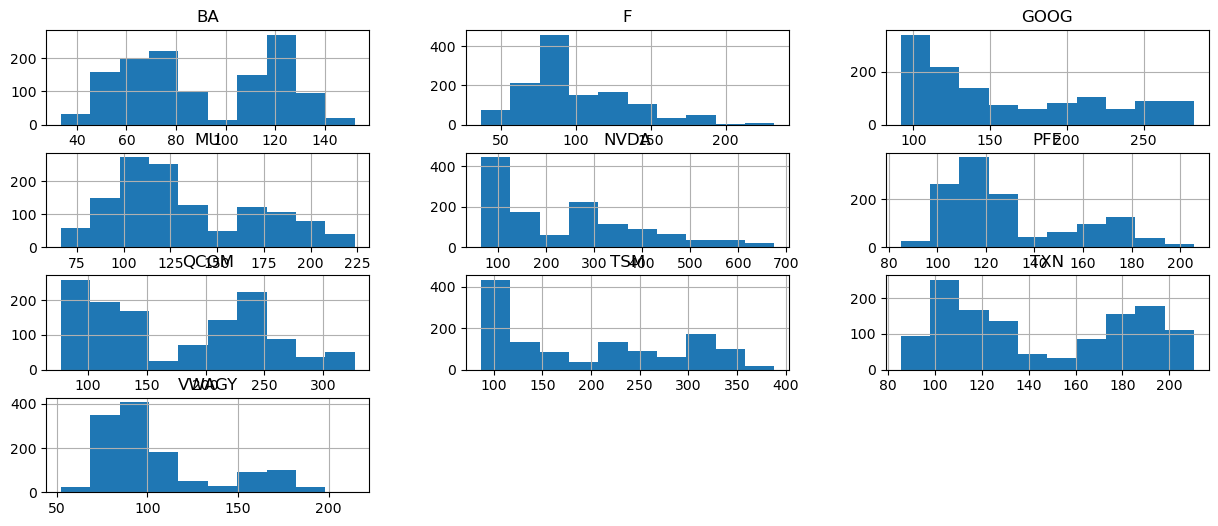

In [11]:
(portfolio / portfolio.iloc[0] * 100).hist(figsize = (15, 6));

In [12]:
#  создаем таблицу относительныхдоходностей
returns = (portfolio / portfolio.shift(1)) - 1  # 0+/-
#  смотрим, что по "краям"
returns.iloc[[0,1,-2,-1]]

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.003234,0.007899,0.016413,0.029998,0.065814,0.007409,0.01135,0.016821,0.027091,0.011375
2022-12-29,0.002813,0.053881,0.028799,0.031148,0.040396,0.010433,0.02683,0.040241,0.023761,0.036453
2022-12-30,0.008364,0.007799,-0.002473,-0.010983,0.000753,-0.001753,0.00091,-0.019868,0.001212,-0.008555


In [13]:
# Удаляем незаполненную (первую) строку
returns.dropna(inplace = True) 
returns

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
Date,,,,,,,,,,
2018-01-03,0.003234,0.007899,0.016413,0.029998,0.065814,0.007409,0.011350,0.016821,0.027091,0.011375
2018-01-04,-0.003795,0.017241,0.003621,0.042241,0.005271,0.002179,0.001365,-0.005274,-0.001291,0.029451
2018-01-05,0.041022,0.016949,0.014571,-0.023038,0.008474,0.001903,0.006664,0.023379,0.007665,0.017189
2018-01-08,0.004242,-0.003788,0.004273,-0.005458,0.030641,-0.011123,-0.003009,-0.000471,0.004765,0.000463
2018-01-09,0.026697,-0.005323,-0.000614,-0.056641,-0.000270,-0.001097,-0.015090,-0.006126,0.006841,0.001619
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.004303,0.004421,0.017562,0.015578,-0.008671,0.003679,0.001446,-0.005181,-0.001943,0.018135
2022-12-27,0.001798,-0.014084,-0.020933,-0.003586,-0.071353,-0.013506,-0.012450,-0.007611,-0.003650,-0.006997
2022-12-28,-0.005385,-0.022321,-0.016718,-0.017993,-0.006019,-0.006454,-0.022748,-0.016954,-0.015814,-0.024664


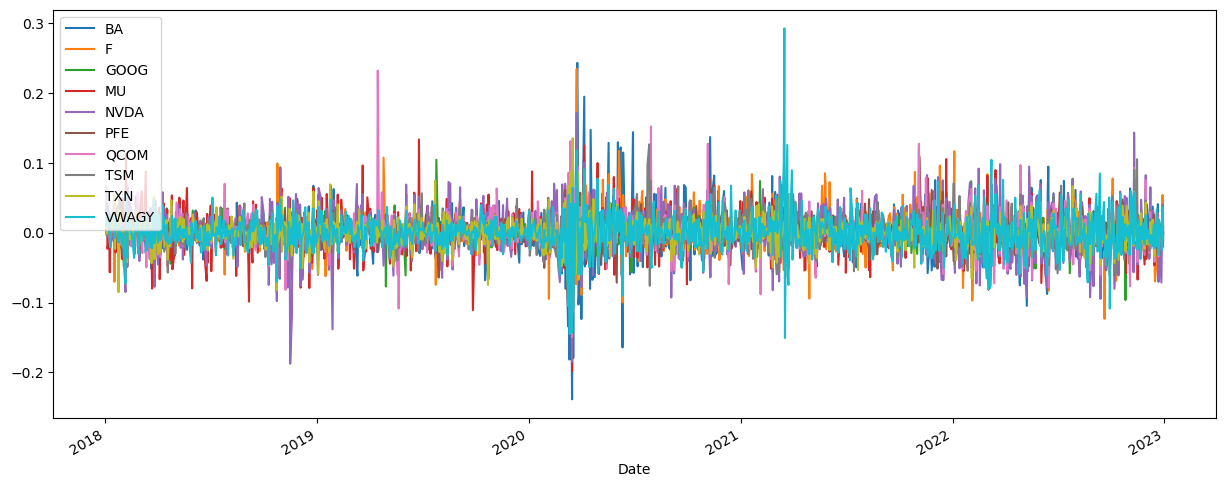

In [14]:
returns.plot(figsize = (15, 6));

In [15]:
# Годовые доходности
annual_returns = returns.mean() * portfolio.shape[0] # mean in period
annual_returns

BA       0.251538
F        0.542300
GOOG     0.756748
MU       0.720446
NVDA     1.763812
PFE      0.747286
QCOM     1.089637
TSM      1.048275
TXN      0.844472
VWAGY    0.382554
dtype: float64

In [16]:
# Строим матрицу ковариаций
cov_matrix_a = returns.cov() * portfolio.shape[0]
cov_matrix_a

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
BA,1.293445,0.575868,0.355432,0.553857,0.527518,0.180822,0.407161,0.352106,0.357746,0.525218
F,0.575868,0.885902,0.265899,0.462752,0.440179,0.127244,0.336661,0.296711,0.286009,0.472562
GOOG,0.355432,0.265899,0.491147,0.420871,0.542471,0.139215,0.382193,0.304120,0.328358,0.297928
MU,0.553857,0.462752,0.420871,1.146856,0.817714,0.162173,0.602440,0.521979,0.552000,0.471287
NVDA,0.527518,0.440179,0.542471,0.817714,1.345270,0.186800,0.689639,0.593074,0.595517,0.466300
PFE,0.180822,0.127244,0.139215,0.162173,0.186800,0.343732,0.140888,0.094499,0.149467,0.148771
QCOM,0.407161,0.336661,0.382193,0.602440,0.689639,0.140888,0.862242,0.443941,0.449857,0.380574
TSM,0.352106,0.296711,0.304120,0.521979,0.593074,0.094499,0.443941,0.612524,0.393696,0.333619
TXN,0.357746,0.286009,0.328358,0.552000,0.595517,0.149467,0.449857,0.393696,0.525192,0.326203
VWAGY,0.525218,0.472562,0.297928,0.471287,0.466300,0.148771,0.380574,0.333619,0.326203,0.897931


In [17]:
# Логарифмируем для нормализации распределений и выравнпивания дисперсий
cov_matrix_LOG = np.log(portfolio / portfolio.shift(1)).cov() * portfolio.shape[0]
cov_matrix_LOG

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
BA,1.299938,0.575621,0.364994,0.568751,0.545310,0.186264,0.421609,0.362796,0.366717,0.537124
F,0.575621,0.877144,0.266765,0.464986,0.441839,0.129224,0.341276,0.297496,0.287549,0.474833
GOOG,0.364994,0.266765,0.492020,0.424967,0.547101,0.140083,0.384231,0.305984,0.329755,0.302358
MU,0.568751,0.464986,0.424967,1.154408,0.825145,0.165100,0.607821,0.526877,0.555466,0.478588
NVDA,0.545310,0.441839,0.547101,0.825145,1.359401,0.189369,0.693708,0.597902,0.598636,0.474348
PFE,0.186264,0.129224,0.140083,0.165100,0.189369,0.342512,0.142808,0.095814,0.149806,0.151917
QCOM,0.421609,0.341276,0.384231,0.607821,0.693708,0.142808,0.850004,0.446729,0.451648,0.388289
TSM,0.362796,0.297496,0.305984,0.526877,0.597902,0.095814,0.446729,0.610719,0.395483,0.339452
TXN,0.366717,0.287549,0.329755,0.555466,0.598636,0.149806,0.451648,0.395483,0.525826,0.330011
VWAGY,0.537124,0.474833,0.302358,0.478588,0.474348,0.151917,0.388289,0.339452,0.330011,0.885869


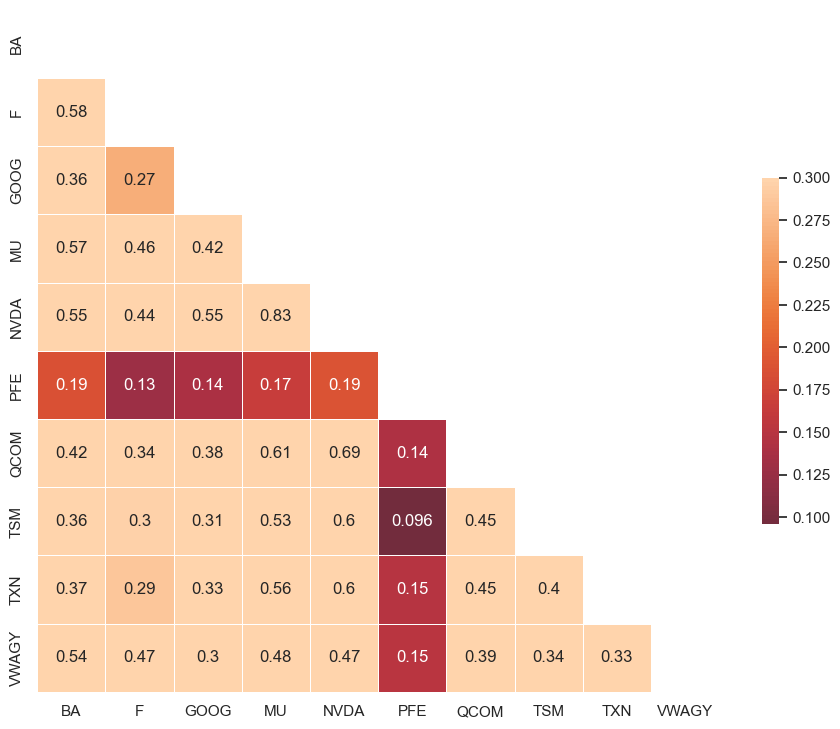

In [18]:
sns.set(style="whitegrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_matrix_LOG, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cov_matrix_LOG, mask=mask,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,);

<span style="color:blue"> Обратите внимание, как доходности акций из разных отраслей ковариирую между собой и как меняется ковариация в разные исторические периоды </span>


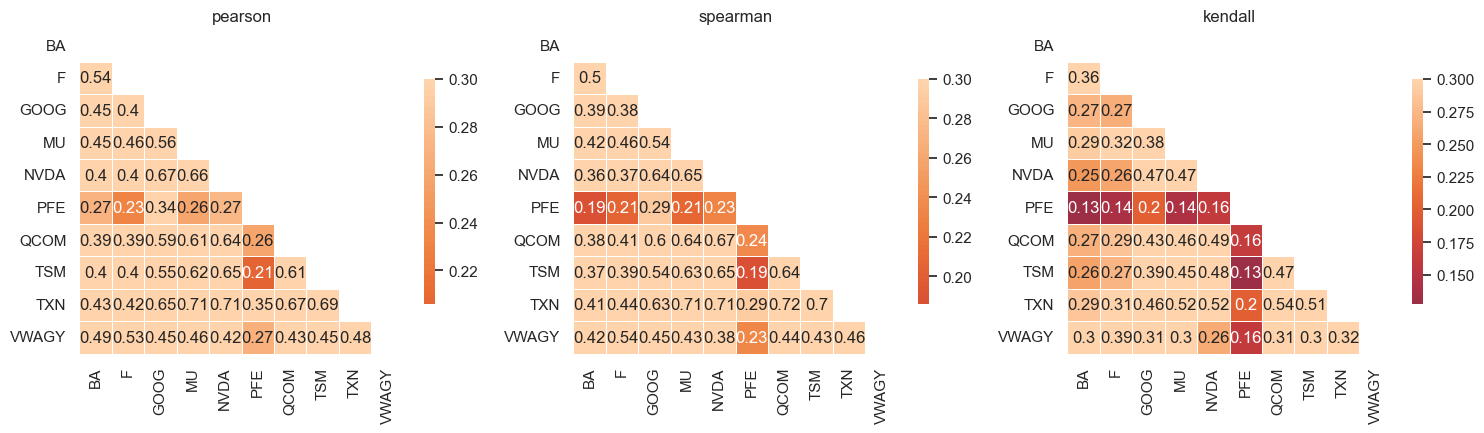

In [19]:
# А что показывает корреляция? 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.set(style="whitegrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_matrix_LOG, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

for corr_type, ax in zip(('pearson', "spearman", 'kendall'),(ax1, ax2, ax3)):

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(returns.corr(method=corr_type), mask=mask,  vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, ax=ax)
    ax.set_title(corr_type)

plt.tight_layout()
plt.show();

In [20]:
# Корреляции с помощью numpy
## For Dimensionality Reduction
correlations = np.abs([np.corrcoef(returns["GOOG"],returns[col_name])[0,1] for col_name in tickers[1:]])
print (list(zip(tickers[1:],correlations)))

[('PFE', 0.3388215413077318), ('BA', 0.4459398989826403), ('F', 0.4031041606400452), ('VWAGY', 0.44862523533105875), ('MU', 0.5607756436850472), ('TSM', 0.554470158468978), ('TXN', 0.6465218042762765), ('QCOM', 0.5873027249802392), ('NVDA', 0.6673688290837608)]


In [21]:
# Не сильно связаны!
correlations[correlations < .8]

array([0.33882154, 0.4459399 , 0.40310416, 0.44862524, 0.56077564,
       0.55447016, 0.6465218 , 0.58730272, 0.66736883])

In [22]:
# Выборка из 2х акций с разными типами корреляций
goog_ba = pd.DataFrame(columns = ('pearson', "spearman", 'kendall'))
for corr_type in goog_ba.columns:
       goog_ba[corr_type] = [returns['GOOG'].corr(other=returns["BA"], method=corr_type)] 
goog_ba

,pearson,spearman,kendall
0,0.44594,0.389888,0.272453


In [23]:
# простой способ
[returns['GOOG'].corr(other=returns["BA"])]

[0.4459398989826403]

In [24]:
# доверительный интервал
returns['GOOG'].sem() 

0.0005568684935623702

In [25]:
# средняя доходность
returns['GOOG'].mean() 

0.0006010704126491861

<AxesSubplot:>

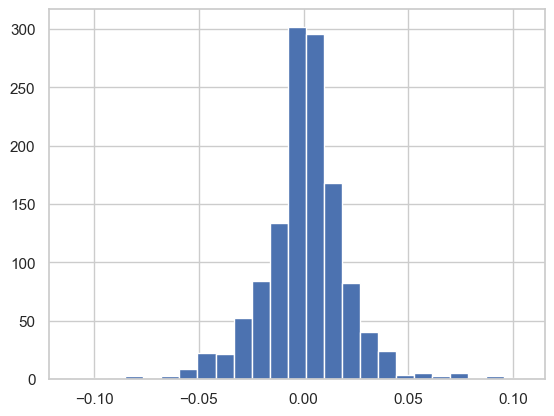

In [26]:
# доходность GOOG на графике
returns['GOOG'].hist(bins=25)